# Split Data

In [1]:
import pandas as pd

# train = pd.read_csv('dataset/train.csv')
# valid = pd.read_csv('dataset/valid.csv')
# test = pd.read_csv('dataset/test.csv')

train = pd.read_csv('Dataset_Egy/train.csv')
valid = pd.read_csv('Dataset_Egy/valid.csv')
test = pd.read_csv('Dataset_Egy/test.csv')

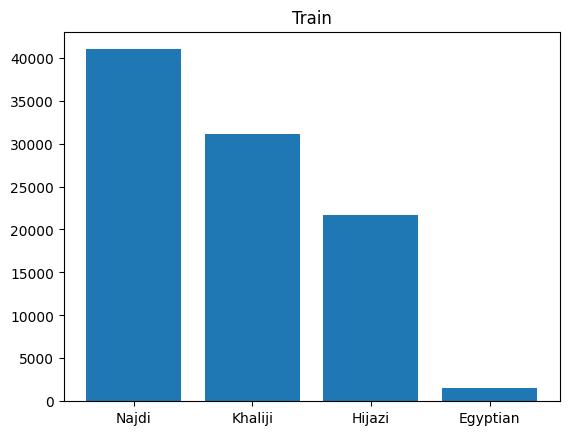

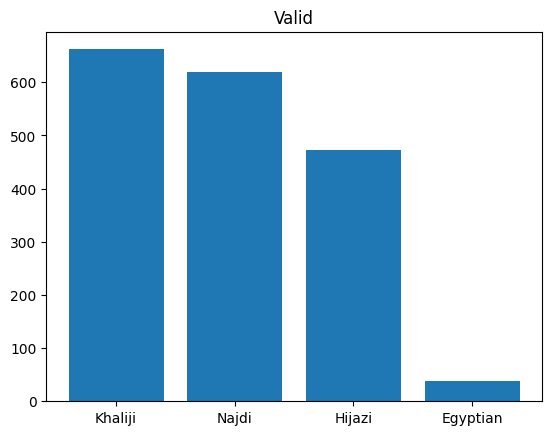

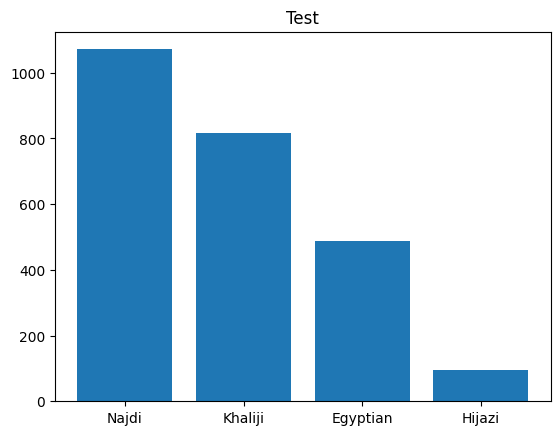

NameError: name 'x' is not defined

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

y_train = np.array(train.SpeakerDialect.value_counts())
x_train = np.array(train.SpeakerDialect.unique())

y_valid = np.array(valid.SpeakerDialect.value_counts())
x_valid = np.array(valid.SpeakerDialect.unique())

y_test = np.array(test.SpeakerDialect.value_counts())
x_test = np.array(test.SpeakerDialect.unique())

plt.bar(x_train, y_train, label='Train')
plt.title('Train')
plt.show()

plt.bar(x_valid, y_valid, label='Valid')
plt.title('Valid')
plt.show()

plt.bar(x_test, y_test, label='Test')
plt.title('Test')
plt.show()

In [ ]:
train_x = train['ProcessedText']
train_y = train['SpeakerDialect']

valid_x = valid['ProcessedText']
valid_y = valid['SpeakerDialect']


test_x = test['ProcessedText']
test_y = test['SpeakerDialect']

In [3]:
train_x.head()

0                                   ووضح كلامك يا مغيث
1                         ترى راسي ما عاد يتحمل الغازك
2                              سلامة راسك يا ابو مسامح
3    ما يصير يا ابو مسامح تخلي البنت في البيت دون امها
4    ويش فيها لقعدت في البيت دون امها ما هو ده بيت ...
Name: ProcessedText, dtype: object

Initial number of rows in training set: 93830
Initial number of rows in testing set: 2375
Number of rows after removing missing values in training set: 93814
Number of rows after removing missing values in testing set: 2375


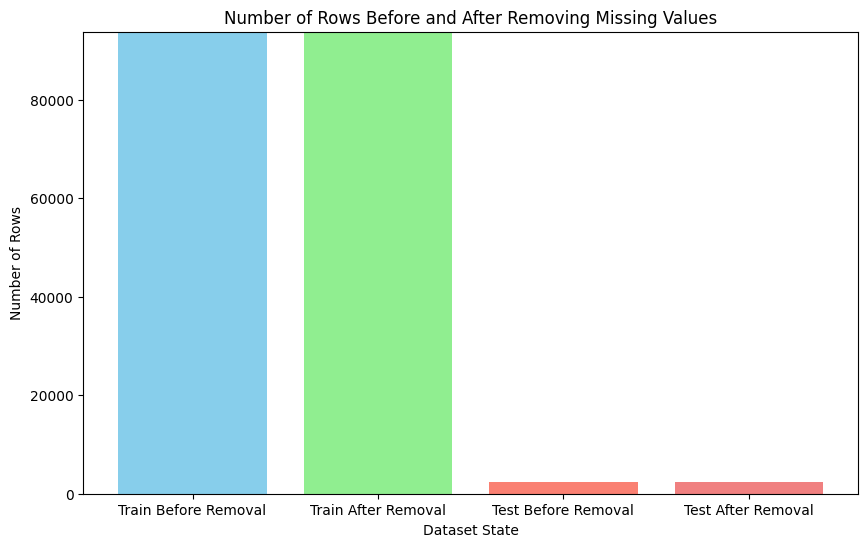

Test Accuracy: 0.49347368421052634

Classification Report:
               precision    recall  f1-score   support

      Hijazi       0.41      0.43      0.42       489
     Khaliji       0.52      0.14      0.22       815
       Najdi       0.52      0.79      0.62      1071

    accuracy                           0.49      2375
   macro avg       0.48      0.45      0.42      2375
weighted avg       0.49      0.49      0.44      2375



In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score

# Load the datasets
# Replace 'train.csv' and 'test.csv' with the paths to your actual dataset files
train = pd.read_csv('dataset/train.csv')
test = pd.read_csv('dataset/test.csv')

# Display initial number of rows
initial_train_count = len(train)
initial_test_count = len(test)
print(f"Initial number of rows in training set: {initial_train_count}")
print(f"Initial number of rows in testing set: {initial_test_count}")

# Remove rows with missing values in 'ProcessedText' or 'SpeakerDialect'
train_cleaned = train.dropna(subset=['ProcessedText', 'SpeakerDialect'])
test_cleaned = test.dropna(subset=['ProcessedText', 'SpeakerDialect'])

# Display number of rows after removal
final_train_count = len(train_cleaned)
final_test_count = len(test_cleaned)
print(f"Number of rows after removing missing values in training set: {final_train_count}")
print(f"Number of rows after removing missing values in testing set: {final_test_count}")

# Plotting the counts
counts = [initial_train_count, final_train_count, initial_test_count, final_test_count]
labels = ['Train Before Removal', 'Train After Removal', 'Test Before Removal', 'Test After Removal']

plt.figure(figsize=(10, 6))
plt.bar(labels, counts, color=['skyblue', 'lightgreen', 'salmon', 'lightcoral'])
plt.xlabel('Dataset State')
plt.ylabel('Number of Rows')
plt.title('Number of Rows Before and After Removing Missing Values')
plt.ylim(0, max(counts) + 10)  # Adding some space above the highest bar
plt.show()

# Define features and target
train_x = train_cleaned['ProcessedText']
train_y = train_cleaned['SpeakerDialect']
test_x = test_cleaned['ProcessedText']
test_y = test_cleaned['SpeakerDialect']

# Define the pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(analyzer='word', ngram_range=(1, 2), max_features=5000)),
    ('clf', LogisticRegression(max_iter=200, solver='lbfgs'))
])

# Train the model
pipeline.fit(train_x, train_y)

# Test the model
test_preds = pipeline.predict(test_x)

# Evaluate the model
print("Test Accuracy:", accuracy_score(test_y, test_preds))
print("\nClassification Report:\n", classification_report(test_y, test_preds))


Initial training rows: 93830
Initial test rows: 2375
After cleaning training rows: 93814
After cleaning test rows: 2375


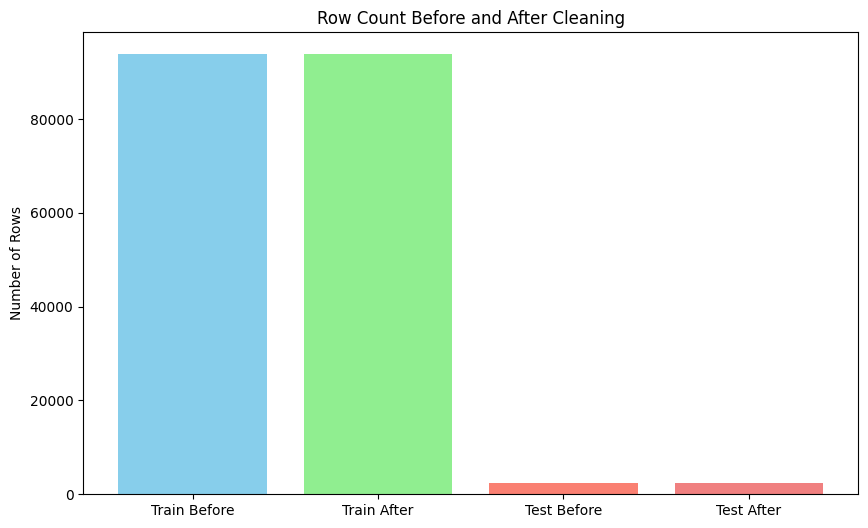


✅ Test Accuracy: 0.4762105263157895

📋 Classification Report:
               precision    recall  f1-score   support

      Hijazi       0.40      0.45      0.42       489
     Khaliji       0.45      0.14      0.22       815
       Najdi       0.51      0.74      0.60      1071

    accuracy                           0.48      2375
   macro avg       0.45      0.45      0.41      2375
weighted avg       0.47      0.48      0.43      2375



In [6]:
# 📚 Imports
import pandas as pd
import matplotlib.pyplot as plt
import re
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score

# 🧼 Arabic text cleaner
def clean_arabic_text(text):
    if pd.isnull(text):
        return ""

    # Normalize letters
    text = re.sub("[إأآا]", "ا", text)
    text = re.sub("ى", "ي", text)
    text = re.sub("ؤ", "ء", text)
    text = re.sub("ئ", "ء", text)
    text = re.sub("ة", "ه", text)

    # Remove diacritics
    text = re.sub(r'[ًٌٍَُِّْـ]', '', text)

    # Remove non-Arabic characters, digits, punctuation
    text = re.sub(r'[^\u0621-\u064A\s]', '', text)

    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()

    return text

# 📂 Load datasets (edit paths as needed)
train = pd.read_csv("dataset/train.csv")
test = pd.read_csv("dataset/test.csv")

# 📊 Show initial row counts
print(f"Initial training rows: {len(train)}")
print(f"Initial test rows: {len(test)}")

# 🧹 Drop rows with missing values
train.dropna(subset=['ProcessedText', 'SpeakerDialect'], inplace=True)
test.dropna(subset=['ProcessedText', 'SpeakerDialect'], inplace=True)

# 📊 Show counts after cleaning
print(f"After cleaning training rows: {len(train)}")
print(f"After cleaning test rows: {len(test)}")

# 📉 Plot bar chart for row count comparison
plt.figure(figsize=(10, 6))
plt.bar(['Train Before', 'Train After'], [len(train) + train.isnull().sum().sum(), len(train)], color=['skyblue', 'lightgreen'])
plt.bar(['Test Before', 'Test After'], [len(test) + test.isnull().sum().sum(), len(test)], color=['salmon', 'lightcoral'])
plt.title("Row Count Before and After Cleaning")
plt.ylabel("Number of Rows")
plt.show()

# 🧼 Apply Arabic text cleaning
train['ProcessedText'] = train['ProcessedText'].astype(str).apply(clean_arabic_text)
test['ProcessedText'] = test['ProcessedText'].astype(str).apply(clean_arabic_text)

# ✂️ Define features and labels
train_x = train['ProcessedText']
train_y = train['SpeakerDialect']
test_x = test['ProcessedText']
test_y = test['SpeakerDialect']

# ⚙️ Combine word and char n-grams
combined_features = FeatureUnion([
    ('word_tfidf', TfidfVectorizer(analyzer='word', ngram_range=(1, 2), max_features=5000)),
    ('char_tfidf', TfidfVectorizer(analyzer='char', ngram_range=(2, 5), max_features=3000))
])

# 🧠 Define pipeline
pipeline = Pipeline([
    ('vectorizer', combined_features),
    ('clf', LogisticRegression(max_iter=300, solver='lbfgs'))
])

# 🚀 Train model
pipeline.fit(train_x, train_y)

# 🧪 Predict and evaluate
test_preds = pipeline.predict(test_x)

print("\n✅ Test Accuracy:", accuracy_score(test_y, test_preds))
print("\n📋 Classification Report:\n", classification_report(test_y, test_preds))


In [8]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd
import re
import matplotlib.pyplot as plt

# 🧼 Arabic cleaning
def clean_arabic_text(text):
    if pd.isnull(text): return ""
    text = re.sub("[إأآا]", "ا", text)
    text = re.sub("ى", "ي", text)
    text = re.sub("ؤ", "ء", text)
    text = re.sub("ئ", "ء", text)
    text = re.sub("ة", "ه", text)
    text = re.sub(r'[ًٌٍَُِّْـ]', '', text)
    text = re.sub(r'[^\u0621-\u064A\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# 📌 Arabic stopwords (partial list — can be expanded)
arabic_stopwords = set([
    'في', 'من', 'إلى', 'على', 'ما', 'عن', 'أن', 'هل', 'هو', 'هي', 'ثم',
    'كل', 'لا', 'لم', 'لن', 'إن', 'قد', 'هذا', 'هذه', 'هناك', 'أنا', 'أنت', 'نحن'
])

train = pd.read_csv("dataset/train.csv")
test = pd.read_csv("dataset/test.csv")

train.dropna(subset=['ProcessedText', 'SpeakerDialect'], inplace=True)
test.dropna(subset=['ProcessedText', 'SpeakerDialect'], inplace=True)

train['ProcessedText'] = train['ProcessedText'].astype(str).apply(clean_arabic_text)
test['ProcessedText'] = test['ProcessedText'].astype(str).apply(clean_arabic_text)

train_x = train['ProcessedText']
train_y = train['SpeakerDialect']
test_x = test['ProcessedText']
test_y = test['SpeakerDialect']

# 🔄 Combine word + char features with stopwords removed
combined_features = FeatureUnion([
    ('word_tfidf', TfidfVectorizer(
        analyzer='word',
        ngram_range=(1, 2),
        max_features=5000,
        stop_words=list(arabic_stopwords)
    )),
    ('char_tfidf', TfidfVectorizer(
        analyzer='char',
        ngram_range=(2, 5),
        max_features=3000
    ))
])

# 🚀 Define and train the pipeline
pipeline = Pipeline([
    ('vectorizer', combined_features),
    ('clf', LogisticRegression(max_iter=300, solver='lbfgs', class_weight='balanced'))
])

pipeline.fit(train_x, train_y)

# 🧪 Evaluate on test set
test_preds = pipeline.predict(test_x)
print("\n✅ Test Accuracy:", accuracy_score(test_y, test_preds))
print("\n📋 Classification Report:\n", classification_report(test_y, test_preds))



✅ Test Accuracy: 0.46821052631578947

📋 Classification Report:
               precision    recall  f1-score   support

      Hijazi       0.38      0.48      0.42       489
     Khaliji       0.43      0.39      0.41       815
       Najdi       0.55      0.52      0.53      1071

    accuracy                           0.47      2375
   macro avg       0.45      0.46      0.46      2375
weighted avg       0.47      0.47      0.47      2375



Initial training rows: 93830
Initial test rows: 2375
After cleaning training rows: 93814
After cleaning test rows: 2375


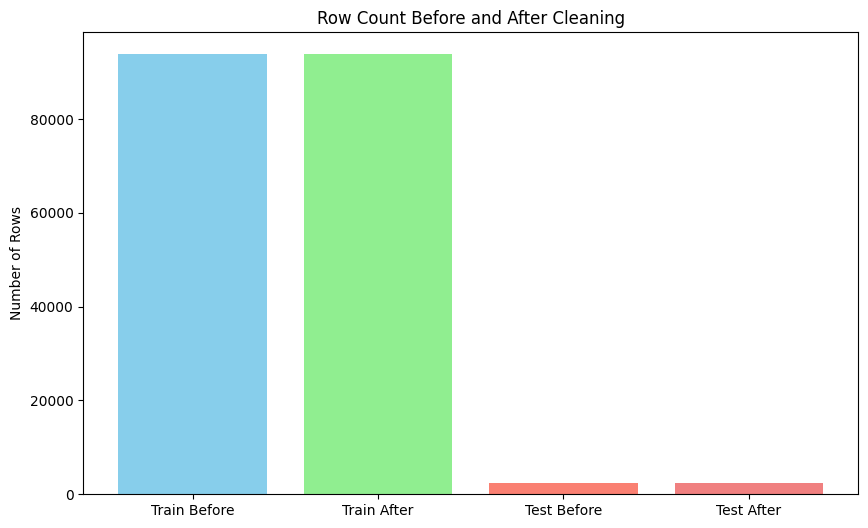

Test Accuracy: 0.48

Classification Report:
              precision    recall  f1-score   support

      Hijazi       0.40      0.48      0.44       489
     Khaliji       0.44      0.42      0.43       815
       Najdi       0.55      0.52      0.54      1071

    accuracy                           0.48      2375
   macro avg       0.47      0.48      0.47      2375
weighted avg       0.48      0.48      0.48      2375



In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Assuming you have DataFrames named 'train' and 'test' loaded
# If not, load them first:
train = pd.read_csv("dataset/train.csv")
test = pd.read_csv("dataset/test.csv")


# 📊 Show initial row counts
print(f"Initial training rows: {len(train)}")
print(f"Initial test rows: {len(test)}")

# 🧹 Drop rows with missing values
train.dropna(subset=['ProcessedText', 'SpeakerDialect'], inplace=True)
test.dropna(subset=['ProcessedText', 'SpeakerDialect'], inplace=True)

# 📊 Show counts after cleaning
print(f"After cleaning training rows: {len(train)}")
print(f"After cleaning test rows: {len(test)}")

# 📉 Plot bar chart for row count comparison
plt.figure(figsize=(10, 6))
plt.bar(['Train Before', 'Train After'], [len(train) + train.isnull().sum().sum(), len(train)], color=['skyblue', 'lightgreen'])
plt.bar(['Test Before', 'Test After'], [len(test) + test.isnull().sum().sum(), len(test)], color=['salmon', 'lightcoral'])
plt.title("Row Count Before and After Cleaning")
plt.ylabel("Number of Rows")
plt.show()

# 🧼 Apply Arabic text cleaning
train['ProcessedText'] = train['ProcessedText'].astype(str).apply(clean_arabic_text)
test['ProcessedText'] = test['ProcessedText'].astype(str).apply(clean_arabic_text)
# 1. Data Preparation
# Split into features and target
train_x = train['ProcessedText']
train_y = train['SpeakerDialect']
test_x = test['ProcessedText']
test_y = test['SpeakerDialect']

# Encode labels if they're not already numerical
label_encoder = LabelEncoder()
train_y_encoded = label_encoder.fit_transform(train_y)
test_y_encoded = label_encoder.transform(test_y)

# 2. Text Preprocessing Pipeline
# For Arabic text, we'll use basic preprocessing and TF-IDF
# You might want to add more sophisticated Arabic-specific preprocessing

preprocessing_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(
        max_features=10000,  # You can adjust this
        ngram_range=(1, 2),  # Using unigrams and bigrams
    )),
])

# 3. Model Training Pipeline
model_pipeline = Pipeline([
    ('preprocessing', preprocessing_pipeline),
    ('classifier', LogisticRegression(
        max_iter=1000,  # Increase if needed
        multi_class='multinomial',  # For multi-class problems
        solver='lbfgs',  # Good for multiclass
        class_weight='balanced'  # Helps with imbalanced classes
    ))
])

# 4. Train the model
model_pipeline.fit(train_x, train_y_encoded)

# 5. Evaluate on test set
test_predictions = model_pipeline.predict(test_x)
test_probabilities = model_pipeline.predict_proba(test_x)

# 6. Print evaluation metrics
print("Test Accuracy:", accuracy_score(test_y_encoded, test_predictions))
print("\nClassification Report:")
print(classification_report(test_y_encoded, test_predictions, 
                           target_names=label_encoder.classes_))

# 7. (Optional) Save the model for later use
#import joblib
#joblib.dump(model_pipeline, 'dialect_classifier.pkl')
#joblib.dump(label_encoder, 'label_encoder.pkl')

# To load later:
# model_pipeline = joblib.load('dialect_classifier.pkl')
# label_encoder = joblib.load('label_encoder.pkl')

Initial training rows: 93814
Initial test rows: 2375
After cleaning training rows: 93814
After cleaning test rows: 2375


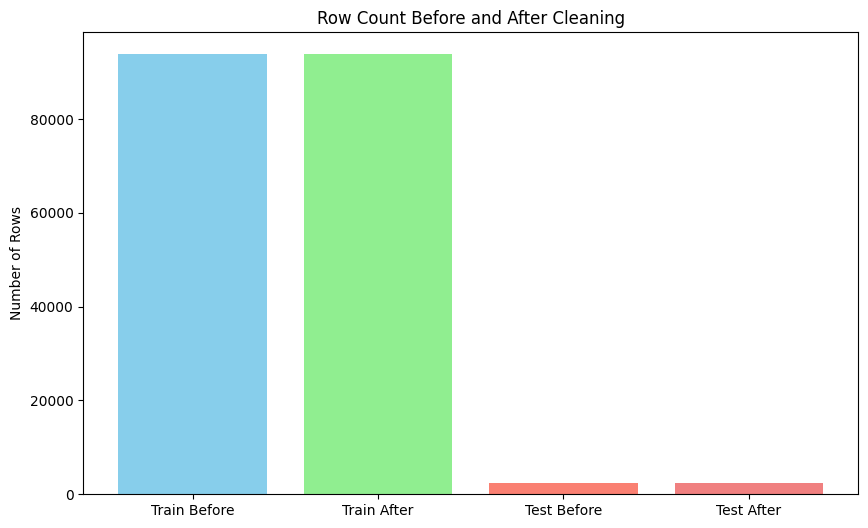

Accuracy: 0.4627

Classification Report:
              precision    recall  f1-score   support

      Hijazi       0.38      0.47      0.42       489
     Khaliji       0.43      0.39      0.41       815
       Najdi       0.53      0.51      0.52      1071

    accuracy                           0.46      2375
   macro avg       0.45      0.46      0.45      2375
weighted avg       0.47      0.46      0.46      2375



In [15]:
import pandas as pd
import numpy as np
import re
from nltk.stem.isri import ISRIStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import joblib

# Arabic Text Preprocessor Class
class ArabicTextPreprocessor:
    def __init__(self):
        self.stemmer = ISRIStemmer()
        # Initialize NLTK Arabic stopwords
        self.stop_words = set(stopwords.words('arabic'))
        
        # Add common dialectal stopwords
        self.stop_words.update([
            'هاذا', 'هذه', 'اللي', 'عنده', 'مثلا', 'كذا', 'غير', 
            'بس', 'طبعا', 'لما', 'يا', 'ان', 'احنا'
        ])
    
    def preprocess(self, text):
        if pd.isna(text):
            return ""
            
        # Remove diacritics
        text = re.sub(r'[\u064B-\u065F]', '', str(text))
        
        # Remove punctuation
        text = re.sub(r'[^\w\s]', ' ', text)
        
        # Remove stopwords
        text = ' '.join(word for word in text.split() if word not in self.stop_words)
        
        # Stemming
        text = ' '.join(self.stemmer.stem(word) for word in text.split())
        
        # Normalize Arabic characters
        text = re.sub(r'[أإآ]', 'ا', text)
        text = re.sub(r'[ة]', 'ه', text)
        text = re.sub(r'[يى]', 'ي', text)
        
        return text

# 1. Load and prepare data (replace with your actual data loading)
# train = pd.read_csv('train.csv')
# test = pd.read_csv('test.csv')

# 📊 Show initial row counts
print(f"Initial training rows: {len(train)}")
print(f"Initial test rows: {len(test)}")

# 🧹 Drop rows with missing values
train.dropna(subset=['ProcessedText', 'SpeakerDialect'], inplace=True)
test.dropna(subset=['ProcessedText', 'SpeakerDialect'], inplace=True)

# 📊 Show counts after cleaning
print(f"After cleaning training rows: {len(train)}")
print(f"After cleaning test rows: {len(test)}")

# 📉 Plot bar chart for row count comparison
plt.figure(figsize=(10, 6))
plt.bar(['Train Before', 'Train After'], [len(train) + train.isnull().sum().sum(), len(train)], color=['skyblue', 'lightgreen'])
plt.bar(['Test Before', 'Test After'], [len(test) + test.isnull().sum().sum(), len(test)], color=['salmon', 'lightcoral'])
plt.title("Row Count Before and After Cleaning")
plt.ylabel("Number of Rows")
plt.show()

# 🧼 Apply Arabic text cleaning
train['ProcessedText'] = train['ProcessedText'].astype(str).apply(clean_arabic_text)
test['ProcessedText'] = test['ProcessedText'].astype(str).apply(clean_arabic_text)

# 3. Encode labels
label_encoder = LabelEncoder()
train_y_encoded = label_encoder.fit_transform(train_y)
test_y_encoded = label_encoder.transform(test_y)

# 4. Initialize preprocessor
arabic_preprocessor = ArabicTextPreprocessor()

# 5. Create pipeline with enhanced Arabic processing
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(
        preprocessor=lambda x: arabic_preprocessor.preprocess(x),
        max_features=15000,
        ngram_range=(1, 3),
        analyzer='word',
        token_pattern=r'\w{1,}',
        sublinear_tf=True
    )),
    ('classifier', LogisticRegression(
        max_iter=1000,
        multi_class='multinomial',
        solver='saga',
        class_weight='balanced',
        penalty='elasticnet',
        l1_ratio=0.5,
        C=1.0
    ))
])

# 6. Train the model
pipeline.fit(train_x, train_y_encoded)

# 7. Evaluate
predictions = pipeline.predict(test_x)
print(f"Accuracy: {accuracy_score(test_y_encoded, predictions):.4f}")
print("\nClassification Report:")
print(classification_report(test_y_encoded, predictions, 
                          target_names=label_encoder.classes_))

# 8. Save model
#joblib.dump(pipeline, 'arabic_dialect_model.pkl')
#joblib.dump(label_encoder, 'label_encoder.pkl')

# To load and use later:
# model = joblib.load('arabic_dialect_model.pkl')
# encoder = joblib.load('label_encoder.pkl')
# prediction = model.predict(["your arabic text here"])
# dialect = encoder.inverse_transform(prediction)[0]